<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/CAPSTONE_Hands_on_Lab_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Lab: Exploratory Data Analysis


##Objectives


Identify outliers in the dataset.

Remove outliers from the dataset.

Identify correlation between features in the dataset.

In [1]:
# import libraries
import pandas as pd

In [2]:
# load dataset into dataframe

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

df = pd.read_csv(file_path)

df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


#Distribution
Determine how the data is distributed

The column ConvertedComp contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

<ipython-input-3-df8b0b66fe9b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], bins=50)


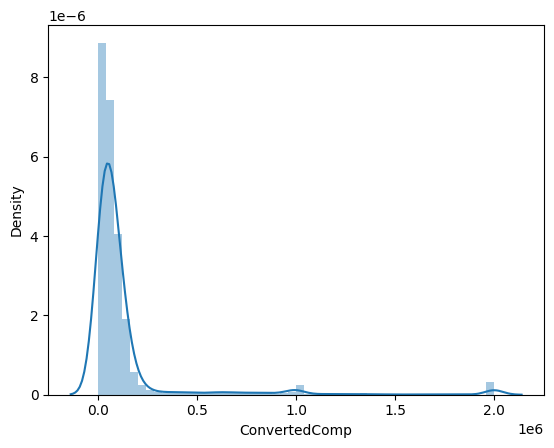

In [3]:
# Plot the distribution curve for the column ConvertedComp

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['ConvertedComp'], bins=50)
plt.show()


In [4]:
# What is the median of the column ConvertedComp?

df['ConvertedComp'].median()


57745.0

In [5]:
# How many responders identified themselves only as a Man?

df['Gender'].value_counts()['Man']


10480

In [6]:
# Find out the median ConvertedComp of responders identified themselves only as a Woman?

df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()


57708.0

In [27]:
# What is the median Age of survey respondents?

df['Age'].median()


29.0

In [7]:
# Give the five number summary for the column Age?

df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]


min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

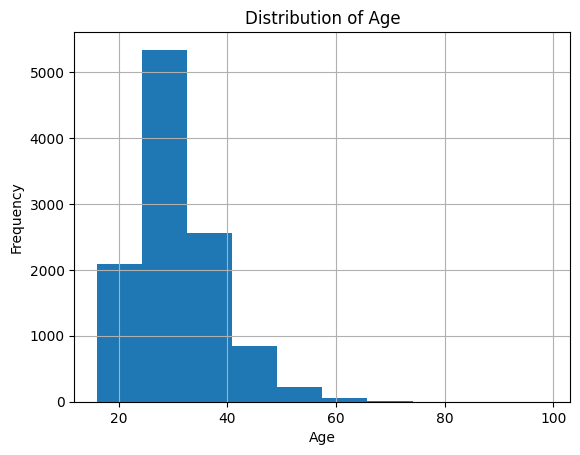

In [8]:
# Plot a histogram of the column Age.

import matplotlib.pyplot as plt
df['Age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


#Outliers
Finding outliers

Find out if outliers exist in the column ConvertedComp using a box plot?

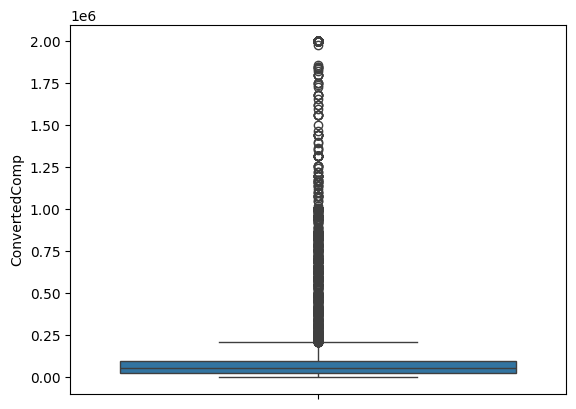

In [9]:
# Find out if outliers exist in the column ConvertedComp using a box plot?

import matplotlib.pyplot as plt
sns.boxplot(df['ConvertedComp'])
plt.show()


In [12]:
# Find out the Inter Quartile Range for the column ConvertedComp.

q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
IQR = q3 - q1
print(IQR)


73132.0


In [29]:
# Based on the boxplot of ‘Age’ how many outliers do you see below Q1?
# Find out how many outliers exist below Q1 for the column Age.

lower_limit = q1 - 1.5 * IQR
outliers_below_q1 = df[df['Age'] < lower_limit]
print(outliers_below_q1.shape[0])


0


In [30]:
# What is the mean ConvertedComp after removing outliers?

# Remove outliers from the column ConvertedComp

upper_limit = q3 + 1.5 * IQR
df_without_outliers = df[df['ConvertedComp'] <= upper_limit]

# Find out the mean of the column ConvertedComp after removing outliers

df_without_outliers['ConvertedComp'].mean()


59883.20838915799

In [17]:
# Find out the upper and lower bounds.

upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

print(f"Upper Bound: {upper_bound}")
print(f"Lower Bound: {lower_bound}")


Upper Bound: 209698.0
Lower Bound: -82830.0


In [18]:
# Identify how many outliers are there in the ConvertedComp column.

outliers = df[((df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound))]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 879


In [28]:
# What is the median ConvertedComp after removing outliers?

df_cleaned = df[((df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound))]
median_cleaned = df_cleaned['ConvertedComp'].median()
print(f"Median ConvertedComp after removing outliers: {median_cleaned}")


Median ConvertedComp after removing outliers: 52704.0


In [20]:
# Create a new dataframe by removing the outliers from the ConvertedComp column.

df_without_outliers = df[((df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound))]
df_without_outliers.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


#Correlation
Finding correlation

Find the correlation between Age and all other numerical columns.

In [26]:
# Find the correlation between Age and all other numerical columns

numerical_columns = df_without_outliers.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_without_outliers[numerical_columns].corr()
age_correlation = correlation_matrix['Age'].sort_values(ascending=False)
print(age_correlation)


Age              1.000000
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CompTotal        0.006337
Respondent       0.002180
CodeRevHrs      -0.012878
Name: Age, dtype: float64


In [31]:
# Which column has a negative correlation with "Age"?

df_without_outliers['Age'].corr(df_without_outliers['CodeRevHrs'])


-0.012877695845513695

In [32]:
# Which column has the highest correlation with "Age"?

print(age_correlation.index[1])


ConvertedComp
